<a href="https://colab.research.google.com/github/CyilleBOTI/7168871-apprenez-les-bases-du-langage-python/blob/main/TP2_Armel_Cyrille__BOTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision tensorflow opencv-python matplotlib numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 884.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

**Exercice 1 : Acquisition et Exploration des Données**

In [ ]:
import torch
from torchvision.datasets import GTSRB
from torchvision import transforms

1-Chargement du dataset GTSRB en utilisant la classe GTSRB de torchvision.datasets.

In [ ]:
# Définition d'une transformation minimale pour convertir l'image en PIL (si besoin)
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Vous pouvez choisir de redimensionner ici, ou plus tard
    transforms.ToTensor()
])

In [ ]:
# Téléchargement du dataset (la première fois, cela peut prendre quelques minutes)
dataset = GTSRB(root="./data", split='train', download=True, transform=None)

100%|██████████| 187M/187M [00:09<00:00, 20.8MB/s]


Remarque : Dans cet exemple, l'image n'est pas modifiée lors du chargement afin de permettre sa manipulation avec PIL ou OpenCV. Vous pouvez la redimensionner ultérieurement si nécessaire.

**Chargement des images dans un DataFrame Pandas**

Nous allons parcourir le dataset et enregistrer dans un DataFrame Pandas les informations essentielles : l’image sous forme de tableau NumPy, le label et, si nécessaire, le chemin d’accès

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image

In [ ]:
data_list = []
for idx in range(len(dataset)):
    # dataset[idx] renvoie un tuple (image, label)
    img, label = dataset[idx]
    # Si l'image est un objet PIL, vous pouvez la convertir en tableau numpy
    img_np = np.array(img)

    data_list.append({
        'image': img_np,
        'label': label,
        # Optionnel : si vous souhaitez sauvegarder le nom/fichier, il faudrait récupérer ce meta-donnée (ici, non fourni par défaut)
    })

df = pd.DataFrame(data_list)

In [ ]:
print("Taille du DataFrame:", df.shape)

Taille du DataFrame: (26640, 2)


**3-Affichage de quelques exemples d’images avec Matplotlib**

Pour vérifier que le chargement des images s'est bien effectué, vous pouvez en afficher quelques-unes. Par exemple, affichons 6 images du dataset avec Matplotlib.

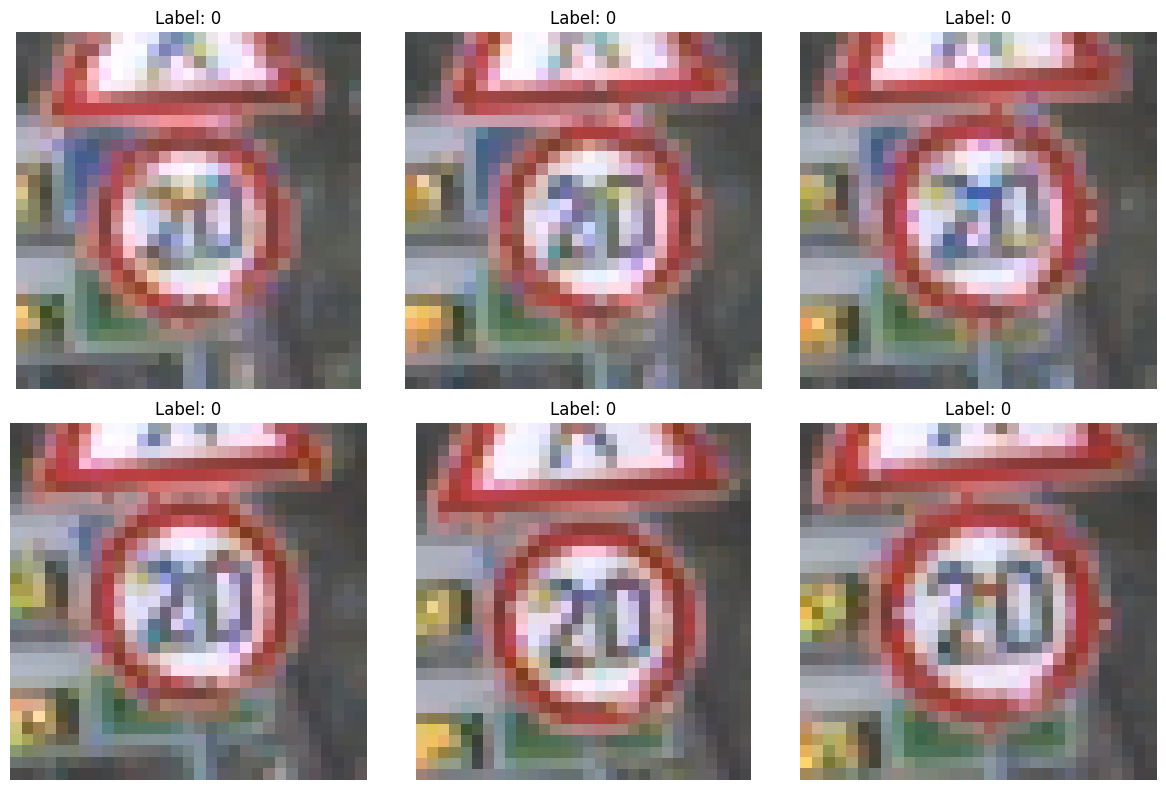

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Affichage des 6 premières images
for i in range(6):
    img = df['image'].iloc[i]
    label = df['label'].iloc[i]
    axes[i].imshow(img)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**4-Vérification des dimensions des images**  

Il est essentiel de s’assurer que toutes les images ont la même taille. Pour cela, nous pouvons ajouter une colonne indiquant la dimension de chaque image, puis analyser la distribution des dimensions.

In [ ]:
# Ajout d'une colonne contenant les dimensions des images
df['dimensions'] = df['image'].apply(lambda im: im.shape)
print("Distribution des dimensions d'image :")
print(df['dimensions'].value_counts())


Distribution des dimensions d'image :
dimensions
(30, 30, 3)      256
(31, 31, 3)      254
(32, 32, 3)      250
(35, 35, 3)      247
(38, 38, 3)      246
                ... 
(166, 170, 3)      1
(172, 172, 3)      1
(87, 101, 3)       1
(122, 143, 3)      1
(142, 143, 3)      1
Name: count, Length: 2489, dtype: int64


**5 - Identification des problèmes potentiels dans les données**
**a) Vérification des tailles d’image différentes**
Comme mentionné précédemment, l'utilisation de la fonction value_counts() sur la colonne des dimensions permet d’identifier les variations de taille parmi les images. Si plusieurs dimensions sont détectées, cela signifie que certaines images n’ont pas la même taille et nécessitent un redimensionnement.

**b) Détection d’images floues**
Une méthode courante pour identifier le flou dans une image consiste à utiliser la variance du Laplacien. Si cette variance est inférieure à un certain seuil, cela signifie que l’image est probablement floue. Cette approche permet de repérer les images de mauvaise qualité et d’envisager un traitement ou une exclusion des images floues du dataset

In [ ]:
import cv2

def est_floue(image, seuil=100.0):
    # Conversion en niveau de gris
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calcul du Laplacian de l'image
    variance = cv2.Laplacian(image_gray, cv2.CV_64F).var()
    return variance < seuil, variance

# Application sur quelques images pour observer la variance
# Changed 'image_resized' to 'image' to use existing column in DataFrame
df['flou'], df['variance'] = zip(*df['image'].apply(est_floue))
print("Nombre d'images floues :", df['flou'].sum())

Nombre d'images floues : 2578


**c - Vérification du déséquilibre des classes**

Pour détecter un éventuel déséquilibre dans les classes, il suffit de compter le nombre d’instances par label. Cela permet d’identifier si certaines classes sont surreprésentées ou sous-représentées, ce qui peut influencer la performance du modèle.

Une approche simple consiste à utiliser Pandas :

In [ ]:
compte_classes = df['label'].value_counts()
print("Distribution des classes :")
print(compte_classes)

Distribution des classes :
label
1     1500
2     1500
13    1440
12    1410
38    1380
10    1350
4     1320
5     1260
25    1020
9      990
8      960
3      960
7      960
11     900
18     810
35     810
17     750
14     540
31     540
33     480
15     420
26     420
23     360
28     360
6      300
34     300
16     300
30     300
22     270
36     270
40     240
21     240
20     240
39     210
32     180
42     180
24     180
27     180
29     180
41     180
0      150
19     150
37     150
Name: count, dtype: int64


**Remarque** : Un déséquilibre important entre les classes peut affecter l’apprentissage d’un CNN. Si certaines classes sont sous-représentées, vous pouvez appliquer des techniques telles que le sur-échantillonnage, le sous-échantillonnage ou l’ajustement des poids des classes dans la fonction de perte.










**Exercice 2 : Prétraitement des Données**

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Fonction de prétraitement d'une image :
def pretraiter_image(image, taille=(32, 32)):
    """
    Convertit l'image en niveaux de gris, redimensionne et normalise.
    :param image: image en format numpy (issu de PIL par exemple)
    :param taille: nouvelle taille (largeur, hauteur)
    :return: image prétraitée sous forme d'un tableau numpy avec des valeurs [0, 1]
    """
    # Convertir l'image en niveaux de gris.
    # Comme les images sont issues de PIL (RGB) et converties en numpy, on utilisera COLOR_RGB2GRAY.
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Redimensionner l'image en 32x32 pixels.
    image_resized = cv2.resize(image_gray, taille)

    # Normaliser les pixels pour avoir des valeurs entre 0 et 1.
    image_norm = image_resized.astype("float32") / 255.0

    return image_norm

In [ ]:
# Appliquer la fonction sur toutes les images du DataFrame
df['image_pretraitee'] = df['image'].apply(lambda im: pretraiter_image(im, taille=(32, 32)))


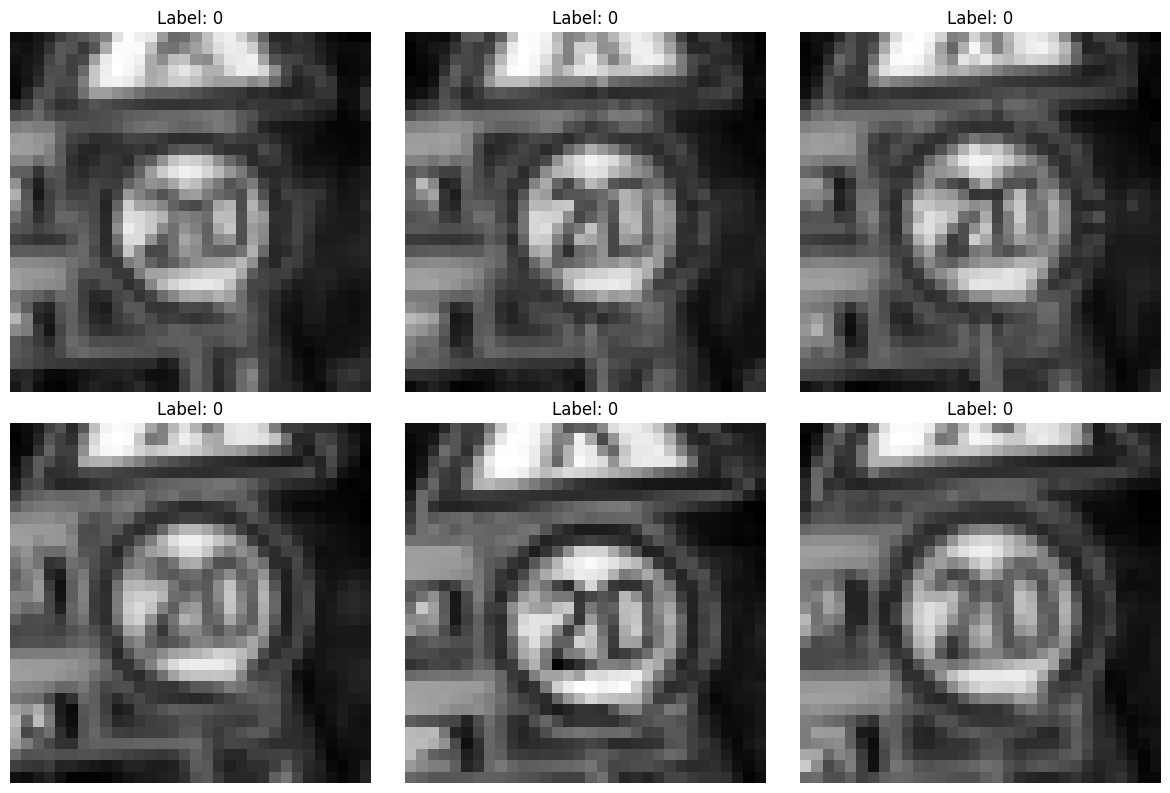

In [ ]:
# Visualisation de quelques images prétraitées pour vérifier
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i in range(6):
    axes[i].imshow(df['image_pretraitee'].iloc[i], cmap='gray')
    axes[i].set_title(f"Label: {df['label'].iloc[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Préparation des données pour le modèle
# Conversion de la colonne "image_pretraitee" en une matrice 4D de forme (n_samples, hauteur, largeur, canaux)
# Étant donné que les images sont en niveaux de gris, un canal supplémentaire est ajouté.
X = np.array(df["image_pretraitee"].tolist())
X = np.expand_dims(X, axis=-1)  # Ajout d'un canal unique pour les images en niveaux de gris


In [ ]:
# Encodage One-Hot des labels
# Si les labels sont numériques (ex : 0, 1, 2,...), la fonction to_categorical de Keras permet de les convertir au format One-Hot.
y = to_categorical(df["label"], num_classes=df["label"].nunique())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Affichage des dimensions des ensembles pour confirmation
print("Dimensions de X_train:", X_train.shape)
print("Dimensions de X_test:", X_test.shape)
print("Dimensions de y_train:", y_train.shape)
print("Dimensions de y_test:", y_test.shape)

Dimensions de X_train: (21312, 32, 32, 1)
Dimensions de X_test: (5328, 32, 32, 1)
Dimensions de y_train: (21312, 43)
Dimensions de y_test: (5328, 43)


**Exercice 3 : Implémentation d'un CNN Basique**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Supposons que X_train et y_train sont déjà prêts (de l'exercice précédent)
# Par exemple : X_train.shape = (num_samples, 32, 32, 1), y_train.shape = (num_samples, num_classes)

# Définition du nombre de classes (à adapter dynamiquement si besoin)
num_classes = y_train.shape[1]
num_classes

43

In [ ]:

# Architecture CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Optionnel mais utile pour éviter l'overfitting
    Dense(num_classes, activation='softmax')  # Couche de sortie pour la classification multi-classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,403 (1.22 MB)

 Trainable params: 319,403 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

**Exercice 4 : Entraînement et Évaluation du Modèle**

**On compile ensuite le modèle en précisant :**

Une fonction de perte adaptée (ici categorical_crossentropy pour les labels one-hot encodés),

Un optimiseur (Adam est un bon choix par défaut),

Une métrique pour évaluer les performances (ici accuracy).

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,403 (1.22 MB)

 Trainable params: 319,403 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

On utilise model.fit() et on stocke le résultat dans une variable pour pouvoir tracer les courbes ensuite :

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 30s 86ms/step - accuracy: 0.1258 - loss: 3.3316 - val_accuracy: 0.6443 - val_loss: 1.3859
Epoch 2/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.5532 - loss: 1.5094 - val_accuracy: 0.8529 - val_loss: 0.6060
Epoch 3/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.7119 - loss: 0.9243 - val_accuracy: 0.9125 - val_loss: 0.3854
Epoch 4/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.7880 - loss: 0.6776 - val_accuracy: 0.9351 - val_loss: 0.2781
Epoch 5/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.8210 - loss: 0.5559 - val_accuracy: 0.9533 - val_loss: 0.2231
Epoch 6/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.8464 - loss: 0.4780 - val_accuracy: 0.9516 - val_loss: 0.1970
Epoch 7/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.8580 - loss: 0.4361 - val_accuracy: 0.9705 - val_loss: 0.1679
Epoch 8/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.8830 - loss: 0.3648 - 

Evaliuation du test

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"📉 Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

**courbes de perte et d’exactitude**


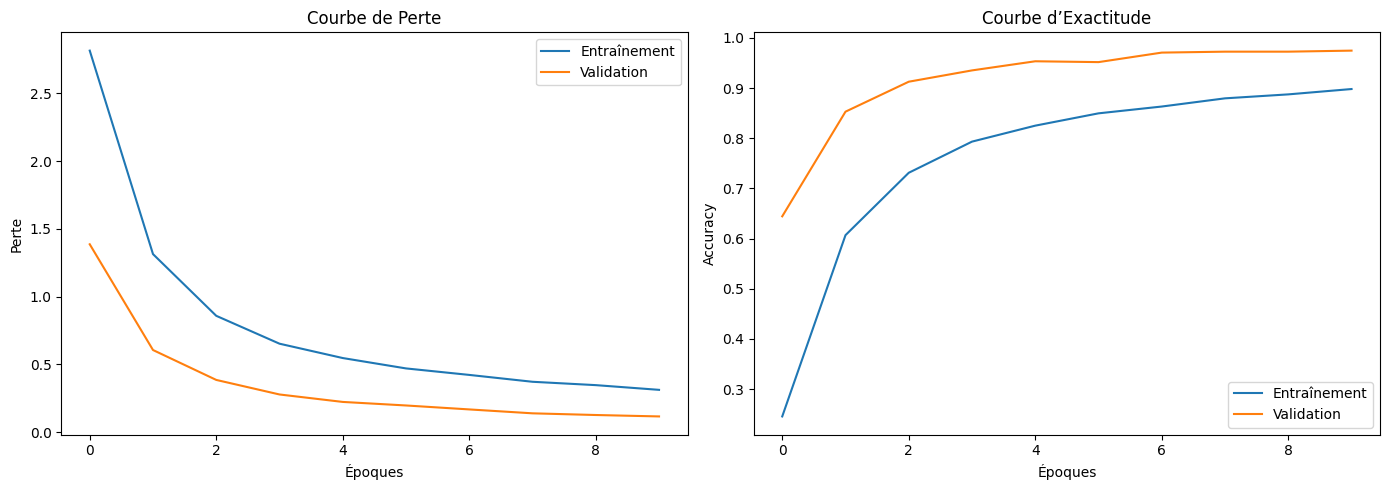

In [ ]:

# Courbe de perte (loss)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Courbe de Perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

# Courbe d'exactitude (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Courbe d’Exactitude")
plt.xlabel("Époques")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

**Exercice 5 : Expérimentation et Amélioration du Modèle**

**Variantes d'Architectures CNN**

Exemple A : CNN avec 3 couches convolutionnelles, + Dropout + plus de filtres

In [ ]:
def create_model_v1(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


Exemple B : Plus petit modèle, activation tanh, optimiseur SGD

In [ ]:
def create_model_v2(input_shape, num_classes):
    model = Sequential([
        Conv2D(16, (5, 5), activation='tanh', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(32, (3, 3), activation='tanh'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(64, activation='tanh'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model


**2-Compilation avec différents optimiseurs**

In [ ]:
# Exemple pour Adam
model_v1 = create_model_v1((32, 32, 1), num_classes)
model_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_v1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,051 (918.17 KB)

 Trainable params: 235,051 (918.17 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Exemple pour SGD
model_v2 = create_model_v2((32, 32, 1), num_classes)
model_v2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_v2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 43)                  │           2,795 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,643 (318.92 KB)

 Trainable params: 81,643 (318.92 KB)

 Non-trainable params: 0 (0.00 B)

**3- Entraînement**

In [ ]:
history_v1 = model_v1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, verbose=1)

Epoch 1/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.1077 - loss: 3.3744 - val_accuracy: 0.6432 - val_loss: 1.2926
Epoch 2/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - accuracy: 0.6578 - loss: 1.1373 - val_accuracy: 0.9048 - val_loss: 0.3796
Epoch 3/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.8654 - loss: 0.4464 - val_accuracy: 0.9506 - val_loss: 0.1923
Epoch 4/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.9216 - loss: 0.2648 - val_accuracy: 0.9628 - val_loss: 0.1437
Epoch 5/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 31s 93ms/step - accuracy: 0.9461 - loss: 0.1819 - val_accuracy: 0.9722 - val_loss: 0.1220
Epoch 6/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.9638 - loss: 0.1270 - val_accuracy: 0.9794 - val_loss: 0.0955
Epoch 7/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 31s 92ms/step - accuracy: 0.9706 - loss: 0.0987 - val_accuracy: 0.9846 - val_loss: 0.0759
Epoch 8/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.9726 - loss: 0.0888 - 

In [ ]:
history_v2 = model_v2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64, verbose=1)

**4-comparaison Visuelle des Performances**

In [ ]:
def plot_comparaison(histories, labels):
    plt.figure(figsize=(14, 6))

    # Loss
    plt.subplot(1, 2, 1)
    for h, label in zip(histories, labels):
        plt.plot(h.history['val_loss'], label=f'Val Loss - {label}')
    plt.title('Courbes de Perte')
    plt.xlabel('Époques')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    for h, label in zip(histories, labels):
        plt.plot(h.history['val_accuracy'], label=f'Val Acc - {label}')
    plt.title('Courbes d’Exactitude')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


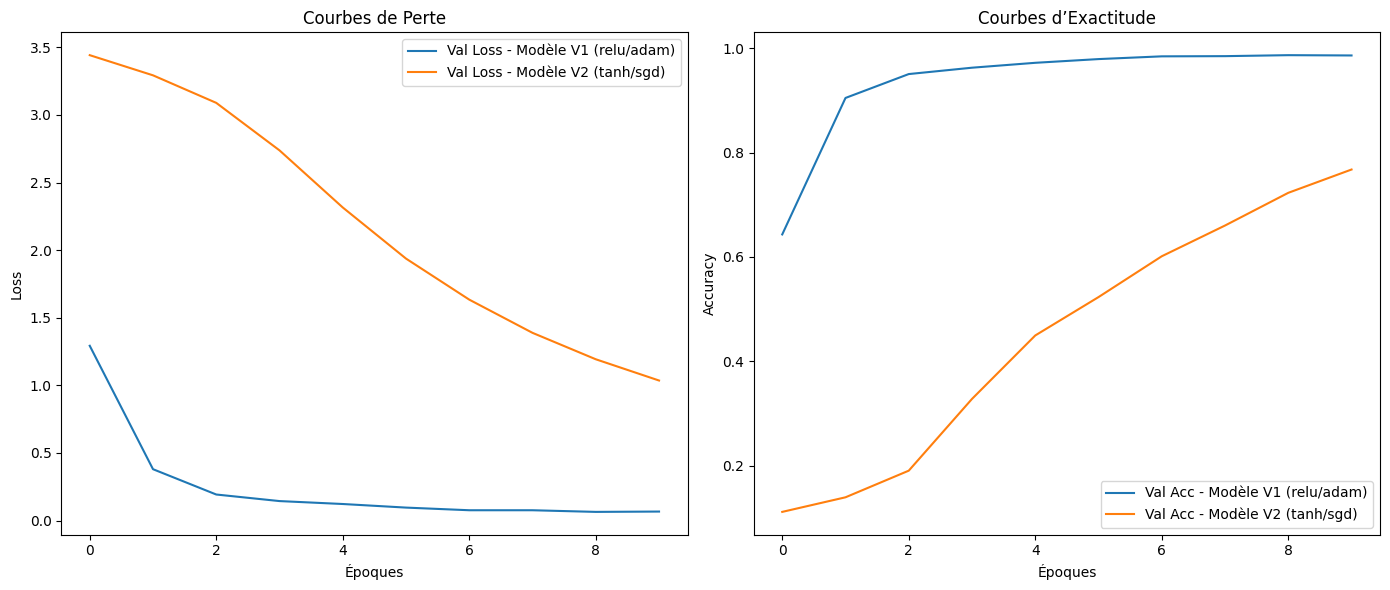

In [ ]:
# Appel de la fonction
plot_comparaison([history_v1, history_v2], ["Modèle V1 (relu/adam)", "Modèle V2 (tanh/sgd)"])

**Exercice 6 : Test sur de Nouvelles Images**

**1-Télécharger quelques images de test depuis torchvision.datasets.GTSRB**

In [ ]:
# Téléchargement du jeu de test (PyTorch le met dans un format PIL)
gtsrb_test = GTSRB(root='./data_test', split='test', download=True)

100%|██████████| 89.0M/89.0M [00:03<00:00, 27.1MB/s]
100%|██████████| 99.6k/99.6k [00:00<00:00, 358kB/s]


**2-Sélection d'une image et prétraitement On va en prendre une au hasard et la transformer comme on l’a fait pour le modèle (gris + resize + normalisation) :**

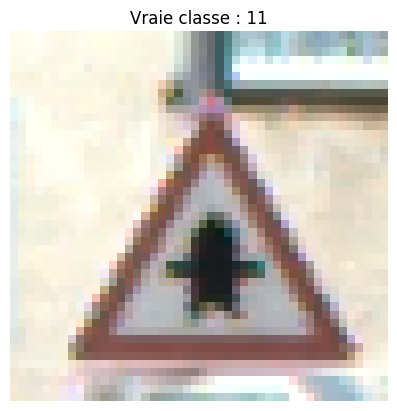

In [ ]:
import random

# Sélection d'une image et de son label
idx = random.randint(0, len(gtsrb_test) - 1)
img, label = gtsrb_test[idx]  # img est un objet PIL

# Affichage brut
plt.imshow(img)
plt.title(f"Vraie classe : {label}")
plt.axis('off')
plt.show()


Prétraitement (comme dans le modèle

In [ ]:
def pretraiter_image_pour_prediction(img_pil):
    # Convertir PIL en NumPy (format RGB)
    img_np = np.array(img_pil)

    # Convertir en niveaux de gris
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

    # Resize 32x32
    img_resized = cv2.resize(img_gray, (32, 32))

    # Normalisation [0, 1]
    img_norm = img_resized.astype('float32') / 255.0

    # Ajouter dimensions pour modèle : (1, 32, 32, 1)
    img_input = np.expand_dims(img_norm, axis=(0, -1))

    return img_input




In [ ]:
# Traitement de l’image
image_model_input = pretraiter_image_pour_prediction(img)

In [ ]:
# Prédiction
prediction = model.predict(image_model_input)
classe_predite = np.argmax(prediction)

print(f"✅ Classe prédite : {classe_predite}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
✅ Classe prédite : 11


Affichage de l'image avec la prédiction

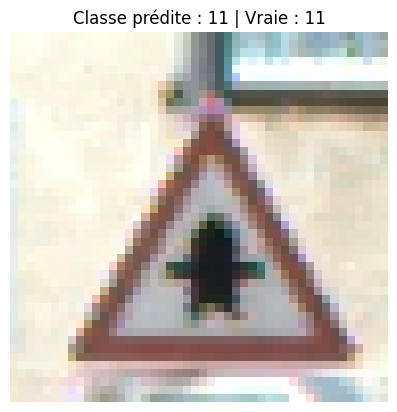

In [ ]:
plt.imshow(img)
plt.title(f"Classe prédite : {classe_predite} | Vraie : {label}")
plt.axis('off')
plt.show()


**Exercice 7 : Exploration Avancée des CNN**

Dynamiquement